In [1]:
import open3d as o3d
import numpy as np
import copy
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils import get_img_simple

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
bunny = o3d.data.BunnyMesh()
gt_mesh = o3d.io.read_triangle_mesh(bunny.path)
pcd = gt_mesh.sample_points_poisson_disk(1000)
pcd.normals = o3d.utility.Vector3dVector(np.zeros(
    (1, 3)))  # invalidate existing normals
pcd.estimate_normals()
pcd.orient_normals_consistent_tangent_plane(100)
o3d.visualization.draw_geometries([pcd], point_show_normal=True)

Loop over all triangles and gather all front-facing triangles (inefficient but ok for now).
If the dot product of the vector from the camera to the triangle and the triangle normal is negative, the triangle is facing the camera. We will then add the triangle to a list of visible triangles.
After this, we can use these triangles to construct a new mesh, which will be the visible part of the mesh.

In [3]:
cam_pos = np.asarray([0.016649405100644721, 0.11013099637261078, 0.18651726973654298])
visible_points = []

points = np.asarray(pcd.points)
normals = np.asarray(pcd.normals)
for point, normal in zip(points, normals):
    cam_triangle_vec = point-cam_pos
    result = np.dot(normal, cam_triangle_vec)
    if result < 0:
        visible_points.append(point)


(881, 3)


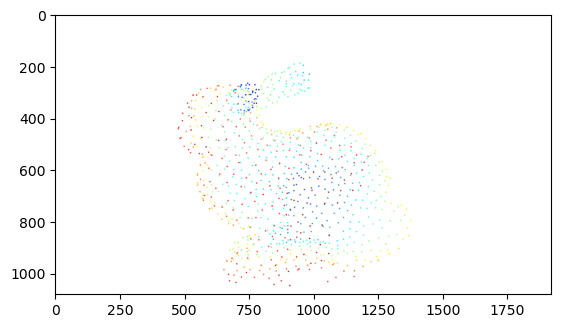

In [4]:
visible_points = np.asarray(visible_points)
print(visible_points.shape)
pcd_vis = o3d.geometry.PointCloud()
pcd_vis.points = o3d.utility.Vector3dVector(visible_points)
o3d.visualization.draw_geometries([pcd_vis])
plt.imshow(get_img_simple([pcd_vis]))